# Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment For Retail Datasets

Last Updated: December 20, 2021 <br>
Author: Winny Claudia Anggreacia

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

## Running The Model

In [130]:
import math
import statistics
import pandas as pd
import numpy as np
import scipy.stats

In [131]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

from IPython.display import Math, Latex
from IPython.core.display import Image

In [132]:
df_sales=pd.read_csv('nyc-rolling-sales.csv')
df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [133]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [134]:
df_sales.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00,84548.00
mean,10344.36,3.00,4237.22,376.22,10731.99,2.03,0.19,2.25,1789.32,1.66
std,7151.78,1.29,3568.26,658.14,1290.88,16.72,8.71,18.97,537.34,0.82
min,4.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,4231.00,2.00,1322.75,22.00,10305.00,0.00,0.00,1.00,1920.00,1.00
50%,8942.00,3.00,3311.00,50.00,11209.00,1.00,0.00,1.00,1940.00,2.00
75%,15987.25,4.00,6281.00,1001.00,11357.00,2.00,0.00,2.00,1965.00,2.00
max,26739.00,5.00,16322.00,9106.00,11694.00,1844.00,2261.00,2261.00,2017.00,4.00


## Data Cleaning

In [135]:
pd.options.display.float_format = '{:.2f}'.format
df_sales.drop('Unnamed: 0',axis=1,inplace=True)

In [136]:
#df_sales.drop(columns='EASE-MENT',axis=1, inplace=True)

In [137]:
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [138]:
df_sales.replace({' -  ':0}, inplace = True)
df_sales['BOROUGH'] = df_sales['BOROUGH'].astype(str)
df_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

In [139]:
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


#### Mengubah tipe data untuk data manipulasi

In [140]:
df_sales['SALE DATE']= pd.to_datetime(df_sales['SALE DATE'])
df_sales['SALE PRICE'] = df_sales['SALE PRICE'].astype(float)

df_sales['LAND SQUARE FEET'] = df_sales['LAND SQUARE FEET'].astype(int)
df_sales['GROSS SQUARE FEET'] = df_sales['GROSS SQUARE FEET'].astype(int)

df_sales['BOROUGH'] = df_sales['BOROUGH'].astype('category')
df_sales['TAX CLASS AT TIME OF SALE'] = df_sales['TAX CLASS AT TIME OF SALE'].astype('category')

#### Adjust nilai yang akan digunakan nanti

In [141]:
df_sales['PRICE/GROSS SQUARE FEET'] = df_sales['SALE PRICE'] / df_sales['GROSS SQUARE FEET']
df_sales['YEAR-MONTH'] = pd.to_datetime(df_sales['SALE DATE']).dt.to_period('M')

df_sales.replace(np.nan,0, inplace = True)
df_sales.replace(np.inf,0, inplace = True)

df_sales['YEAR-MONTH'] = df_sales['YEAR-MONTH'].astype('category')

In [142]:
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE/GROSS SQUARE FEET,YEAR-MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000.00,2017-07-19,1028.73,2017-07
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616,18690,1900,2,C7,0.00,2016-12-14,0.00,2016-12
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212,7803,1900,2,C7,0.00,2016-12-09,0.00,2016-12
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272.00,2016-09-23,579.37,2016-09
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000.00,2016-11-17,1733.48,2016-11


In [143]:
df_sales['NEIGHBORHOOD'].describe()

count              84548
unique               254
top       FLUSHING-NORTH
freq                3068
Name: NEIGHBORHOOD, dtype: object

In [144]:
df_sales.value_counts(['NEIGHBORHOOD'])

NEIGHBORHOOD            
FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
BRONX PARK                     1
PELHAM BAY                     1
Length: 254, dtype: int64

## Mean

### Q1 Rata-rata tertinggi jumlah block pada Neighborhood

In [145]:
block_mean = df_sales.groupby(['NEIGHBORHOOD']) \
.agg(block_mean = pd.NamedAgg('BLOCK', np.mean)) \
.reset_index()

block_mean.sort_values(by="block_mean")

,NEIGHBORHOOD,block_mean
163,NEW BRIGHTON-ST. GEORGE,5.10
78,FINANCIAL,32.44
63,DOWNTOWN-FULTON FERRY,42.48
162,NEW BRIGHTON,55.73
214,SOUTHBRIDGE,93.96
...,...,...
6,ARVERNE,16005.08
108,HAMMELS,16125.18
196,ROCKAWAY PARK,16206.05
16,BELLE HARBOR,16248.17


### Insight :
Rata-rata Neponist neighborhood memiliki jumlah block terbanyak dibanding yang lainnya

## Median

### Q2 Mencari median tertinggi untuk jumlah block setiap Neighborhood

In [146]:
block_median = df_sales.groupby(['NEIGHBORHOOD']) \
    .agg(block_median = pd.NamedAgg('SALE PRICE', np.median)) \
    .reset_index()


block_median.sort_values(by="block_median")

,NEIGHBORHOOD,block_median
243,WILLIAMSBURG-CENTRAL,0.00
32,BUSH TERMINAL,0.00
194,RIDGEWOOD,0.00
7,ASTORIA,0.00
23,BOROUGH PARK,10.00
...,...,...
209,SOHO,1896250.00
83,FLATIRON,1900000.00
227,TRIBECA,2272500.00
43,CIVIC CENTER,4724680.00


### Insight

Median tertinggi ada pada East River

## Modus

### Q3 Mencari angka yang sering muncul (mode) dari tahun dibangunnya unit (YEAR BUILD) tersebut

In [147]:
modus_build = df_sales.groupby(['BOROUGH']) \
    .agg(modus_build = pd.NamedAgg('YEAR BUILT', statistics.mode)) \
    .reset_index()

modus_build.sort_values(by="modus_build")

,BOROUGH,modus_build
0,Bronx,0
1,Brooklyn,0
2,Manhattan,0
3,Queens,1920
4,Staten Island,1970


### Insight

Tahun pembangunan yang sering muncul dalam data adalah Staten Island pada tahun 1970

## Measure of Spread

### Q4 Mencari range pada harga jual di masing-masing BOROUGH

In [148]:
df_sales = df_sales.loc[df_sales["SALE PRICE"].notnull(), :]

df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE/GROSS SQUARE FEET,YEAR-MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000.00,2017-07-19,1028.73,2017-07
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616,18690,1900,2,C7,0.00,2016-12-14,0.00,2016-12
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212,7803,1900,2,C7,0.00,2016-12-09,0.00,2016-12
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272.00,2016-09-23,579.37,2016-09
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000.00,2016-11-17,1733.48,2016-11


In [149]:
df_sales_Nnull = df_sales.loc[df_sales["SALE PRICE"]!=0, :]

df_sales_Nnull.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE/GROSS SQUARE FEET,YEAR-MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000.00,2017-07-19,1028.73,2017-07
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272.00,2016-09-23,579.37,2016-09
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000.00,2016-11-17,1733.48,2016-11
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750,4226,1920,2,C4,3192840.00,2016-09-23,755.52,2016-09
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,4489,18523,1920,2,D9,16232000.00,2016-11-07,876.32,2016-11


In [150]:
df_sales_nb = df_sales_Nnull.groupby(["NEIGHBORHOOD"]) \
      .agg(df_sales_nb = pd.NamedAgg("SALE PRICE", np.ptp)) \
      .reset_index()

df_sales_nb.sort_values(by="df_sales_nb")
# Graded-Function End

,NEIGHBORHOOD,df_sales_nb
179,PELHAM BAY,0.00
27,BRONX PARK,0.00
42,CITY ISLAND-PELHAM STRIP,0.00
69,EAST RIVER,0.00
234,VAN CORTLANDT PARK,34900.00
...,...,...
63,DOWNTOWN-FULTON FERRY,344999999.00
76,FASHION,564841360.00
132,KIPS BAY,619999990.00
78,FINANCIAL,1039999990.00


### Insight

Harga jual tertinggi ada Midtown CBD

## Variance

### Q5 : Mencari nilai variance price/gross square feet tertinggi per borough

In [151]:
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE/GROSS SQUARE FEET,YEAR-MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000.00,2017-07-19,1028.73,2017-07
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616,18690,1900,2,C7,0.00,2016-12-14,0.00,2016-12
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212,7803,1900,2,C7,0.00,2016-12-09,0.00,2016-12
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272.00,2016-09-23,579.37,2016-09
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000.00,2016-11-17,1733.48,2016-11


In [152]:
variance = df_sales_Nnull.groupby(["BOROUGH"]) \
      .agg(variance = pd.NamedAgg("PRICE/GROSS SQUARE FEET", np.var)) \
      .reset_index()

variance.sort_values(by="variance")

,BOROUGH,variance
4,Staten Island,33107.16
0,Bronx,40918.01
3,Queens,100740.70
2,Manhattan,219735.71
1,Brooklyn,597891.08


### Insight

Brooklyn memiliki price/gross square feet tertinggi. Sedangkan Staten Island memiliki price/gross square feet terendah

## Standard Deviation

### Q6 Mencari distribusi standard deviasi price/gross square feet per borough

In [153]:
stand_dev=df_sales_Nnull.groupby(["BOROUGH"]) \
      .agg(stand_dev = pd.NamedAgg("PRICE/GROSS SQUARE FEET", np.std)) \
      .reset_index()

stand_dev.sort_values(by="stand_dev")

,BOROUGH,stand_dev
4,Staten Island,181.95
0,Bronx,202.28
3,Queens,317.40
2,Manhattan,468.76
1,Brooklyn,773.23


### Insight

Nilai standard deviasi price/gross square feet tertinggi adalah Brooklyn. Yang terendah adalah Staten Island

## Probability Distributions

### Q7 Membuat distribusi probabilitas atas harga jual properti pada masing-masing borough

In [154]:
import scipy.stats as stats
import statsmodels.api as sm
import random
import warnings

In [155]:
prob_dist = df_sales_Nnull[df_sales_Nnull["SALE PRICE"] < 2E5]
prob_dist.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE/GROSS SQUARE FEET,YEAR-MONTH
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,0,0,1920,2,C6,1.00,2016-09-06,0.00,2016-09
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,...,0,0,0,1920,2,C6,10.00,2017-04-28,0.00,2017-04
41,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2C,393,39,,C6,"163 AVENUE C, 2",,...,0,0,0,1900,2,C6,25000.00,2017-06-14,0.00,2017-06
60,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2C,401,50,,C6,"527 EAST 5 STREET, 1",,...,0,0,0,1900,2,C6,54993.00,2017-01-19,0.00,2017-01
207,Manhattan,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,...,1,1588,5653,1900,1,A4,10.00,2017-01-30,0.00,2017-01


In [156]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,8)})

C:\Users\winny\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probabilitas yang Muncul')

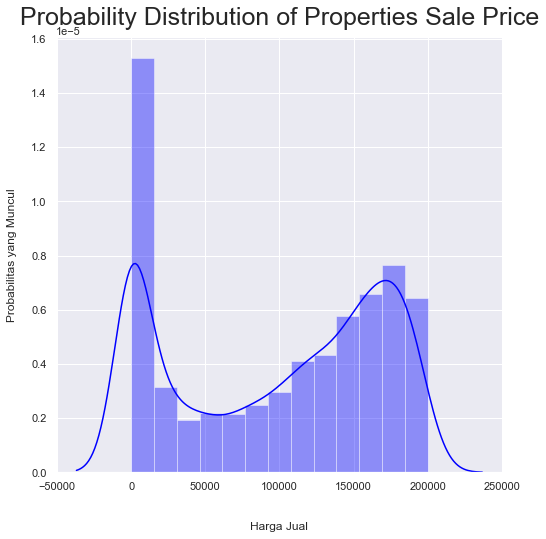

In [157]:
sns.distplot(prob_dist["SALE PRICE"], color="blue")

plt.title("Probability Distribution of Properties Sale Price", y=1.015, fontsize=25)
plt.xlabel("Harga Jual", labelpad=30)
plt.ylabel("Probabilitas yang Muncul", labelpad=14)

Text(-0.16499999999999915, 0.5, 'Probabilitas yang Muncul')

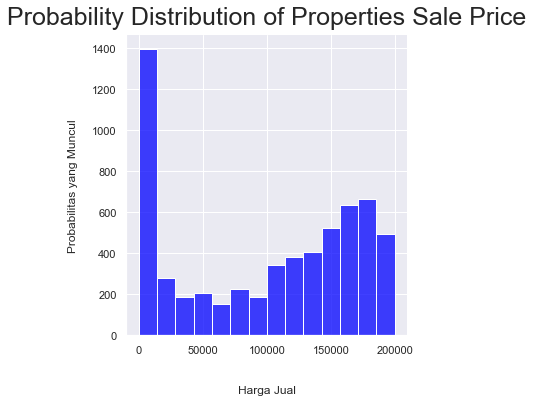

In [158]:
sns.displot(prob_dist["SALE PRICE"], color="blue")

plt.title("Probability Distribution of Properties Sale Price", y=1.015, fontsize=25)
plt.xlabel("Harga Jual", labelpad=30)
plt.ylabel("Probabilitas yang Muncul", labelpad=14)

### Insight 

Nilai probabilitas distribusi untuk harga jual properti di NYC < 2E6 memiliki pola distribusi normal 

## Confidence Intervals

### Q8 menganalisa nilai Confidence Intervals untuk data price/gross square feet pada masing-masing Borough 

In [159]:
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE/GROSS SQUARE FEET,YEAR-MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000.00,2017-07-19,1028.73,2017-07
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616,18690,1900,2,C7,0.00,2016-12-14,0.00,2016-12
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212,7803,1900,2,C7,0.00,2016-12-09,0.00,2016-12
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272.00,2016-09-23,579.37,2016-09
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000.00,2016-11-17,1733.48,2016-11


In [160]:
df_sales_Nnull.groupby("BOROUGH").aggregate({"PRICE/GROSS SQUARE FEET": [np.mean, np.std, np.size]})

PRICE/GROSS SQUARE FEET                
                                 mean    std     size
BOROUGH                                              
Bronx                          163.08 202.28  5178.00
Brooklyn                       261.14 773.23 15690.00
Manhattan                       72.40 468.76 14439.00
Queens                         241.52 317.40 18441.00
Staten Island                  265.05 181.95  6011.00

In [161]:
mean_Queens = 241.52
std_Queens= 317.40
size_Queens = 18441.00
z = 1.83

standdev_mean_Queens = std_Queens / np.sqrt(size_Queens)
print("Standard error mean of price/gross square feet in Queens:", standdev_mean_Queens)

Standard error mean of price/gross square feet in Queens: 2.3373012347537605


In [162]:
def hitung_CI(estimate, standdev, z_score=1.83):
    return (
        estimate - z_score*standdev,
        estimate + z_score*standdev
    )

In [163]:
lower_CI, upper_CI =hitung_CI(mean_Queens, standdev_mean_Queens)
print ('Result:')
print(f"CI for price/gross square feet in Queens: [{lower_CI:.3f}, {upper_CI:.3f}]",)

Result:
CI for price/gross square feet in Queens: [237.243, 245.797]


### Insight

Nilai Confidence Intervals price/gross square feet untuk Queens adalah [237.243, 245.797]

## Hyphotesis Testing

In [164]:
import statsmodels.api as sm
df_sales_Nnull.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE/GROSS SQUARE FEET,YEAR-MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000.00,2017-07-19,1028.73,2017-07
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272.00,2016-09-23,579.37,2016-09
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000.00,2016-11-17,1733.48,2016-11
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750,4226,1920,2,C4,3192840.00,2016-09-23,755.52,2016-09
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,4489,18523,1920,2,D9,16232000.00,2016-11-07,876.32,2016-11


In [165]:
df_sales_Nnull.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,PRICE/GROSS SQUARE FEET
count,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00,59759.00
mean,4151.62,390.77,10705.74,1.73,0.16,1.90,2437.37,2274.16,1810.11,1494927.31,201.38
std,3568.94,670.84,1264.10,14.16,9.82,17.34,36215.11,24054.22,505.75,12329530.52,504.00
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,1277.00,21.00,10301.00,0.00,0.00,0.00,0.00,0.00,1920.00,370000.00,0.00
50%,3167.00,50.00,11207.00,1.00,0.00,1.00,1056.00,0.00,1940.00,625500.00,0.00
75%,6107.00,1002.00,11356.00,2.00,0.00,2.00,2500.00,1848.00,1966.00,1070000.00,339.67
max,16319.00,9106.00,11694.00,1844.00,2261.00,2261.00,4252327.00,3750565.00,2017.00,2210000000.00,75974.85


In [166]:
df_Bronx= df_sales[df_sales["BOROUGH"] == 'Bronx']
df_Manhattan = df_sales[df_sales["BOROUGH"] == 'Manhattan']

num_Bronx = len(df_Bronx)
num_Queens = len(df_Manhattan)

# mean
mean_Bronx = df_Bronx["SALE PRICE"].mean()
mean_Manhattan = df_Manhattan["SALE PRICE"].mean()

# std
std_Bronx = df_Bronx["SALE PRICE"].std()
std_Manhattan = df_Manhattan["SALE PRICE"].std()

In [167]:
sm.stats.ztest(df_Bronx["SALE PRICE"].dropna(), df_Manhattan["SALE PRICE"].dropna(), alternative="two-sided")

(-7.971185178766368, 1.571598098850837e-15)

## Insight

- Ho = Bronx = Manhattan
- H1 = Bronx ≠ Manhattan


Karena p-value (1.571598098850837e-15) sangat kecil, kita dapat reject the Null Hypotesis bahwa rata-rata harga jual di Bronx sama dengan di Manhattan

## Finish

Terima kasih